datetime64[ns, UTC]
Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'time',
       'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1', 'temp_max_1',
       'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1', 'rain_1h_1',
       'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2', 'temp_min_2',
       'temp_max_2', 'pressure_2'

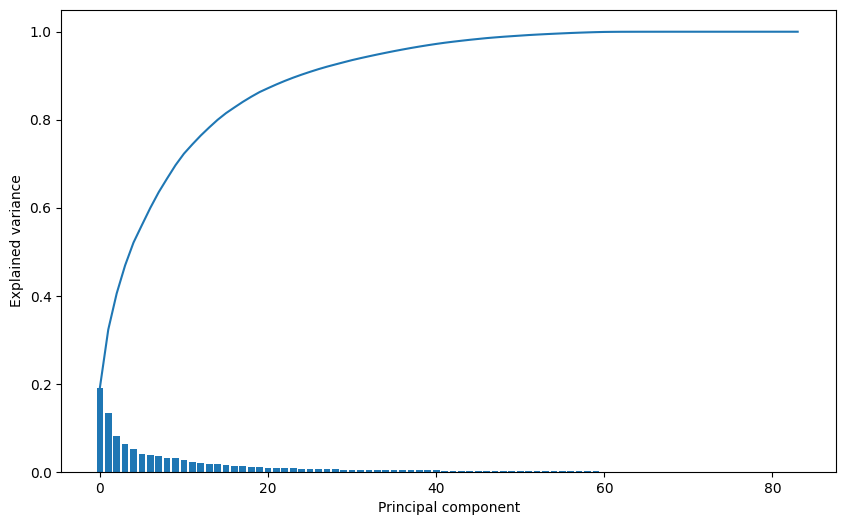

(31533, 24, 16) (31533,)
(3483, 24, 16) (3483,)


NameError: name 'buffer_size' is not defined

NameError: name 'buffer_size' is not defined

In [ ]:
#%run featuregeneration.ipynb

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../datasets/EU_energy_data.csv')

df = df.rename(columns = {'fecha' : 'Date','hora' : 'Hour' , 'sistema' : 'EU_countries','bandera' : 'non-green_conventional_electricity',
                         'precio' : 'Cost(€/MWh)','tipo_moneda' : 'CurrencyType','origen_dato' : 'DataSource', 'fecha_actualizacion' : 'Updated_Date'})

# HU: Hungary
# DK1: Denmark (Western)
# DK2: Denmark (Eastern)
# EE: Estonia
# ELE: Possibly a specific region or market within a country
# FI: Finland
# GB: Great Britain
# LT: Lithuania
# NO1, NO2, NO3, NO4, NO5: Different regions in Norway
# SE1, SE2, SE3, SE4: Different regions in Sweden
# SYS: System-wide or aggregated data
# LV: Latvia
# ES: Spain
# FR: France
# PT: Portugal
# FRE: Possibly a specific region or market within France
# RS: Serbia
# AT: Austria
# BE: Belgium
# DE: Germany
# NL: Netherlands
# IT: Italy
# CALA, CNOR, CSUD, NORD, SARD, SICI, SUD: Different regions in Italy

In [ ]:
print(df.head())
print(df.describe())
print(df.shape)

   Unnamed: 0        Date  Hour EU_countries  \
0           0  2010-07-21     1           HU   
1           1  2010-07-21     2           HU   
2           2  2010-07-21     3           HU   
3           3  2010-07-21     4           HU   
4           4  2010-07-21     5           HU   

   non-green_conventional_electricity  Cost(€/MWh)  CurrencyType  DataSource  \
0                                   1       39.287             1           6   
1                                   1       35.925             1           6   
2                                   1       33.223             1           6   
3                                   1       30.842             1           6   
4                                   1       33.395             1           6   

          Updated_Date  
0  2021-10-01 12:39:53  
1  2021-10-01 12:39:53  
2  2021-10-01 12:39:53  
3  2021-10-01 12:39:53  
4  2021-10-01 12:39:53  
         Unnamed: 0          Hour  non-green_conventional_electricity  \
count  

In [ ]:
# Display summary statistics for relevant columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 9 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Unnamed: 0                          int64  
 1   Date                                object 
 2   Hour                                int64  
 3   EU_countries                        object 
 4   non-green_conventional_electricity  int64  
 5   Cost(€/MWh)                         float64
 6   CurrencyType                        int64  
 7   DataSource                          int64  
 8   Updated_Date                        object 
dtypes: float64(1), int64(5), object(3)
memory usage: 125.8+ MB


In [2]:
sns.histplot(df['Cost(€/MWh)'], bins=30, kde=True)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
print('There are {} missing values or NaNs in df_energy.'
      .format(df.isnull().values.sum()))

temp_df = df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(df))

There are 0 missing values or NaNs in df_energy.
There are          Unnamed: 0        Date  Hour EU_countries  \
0                 0  2010-07-21     1           HU   
1                 1  2010-07-21     2           HU   
2                 2  2010-07-21     3           HU   
3                 3  2010-07-21     4           HU   
4                 4  2010-07-21     5           HU   
...             ...         ...   ...          ...   
1831550     1831550  2022-01-08    24          SE3   
1831551     1831551  2022-01-08    24          SE4   
1831552     1831552  2022-01-08    24         SICI   
1831553     1831553  2022-01-08    24          SUD   
1831554     1831554  2022-01-08    24          SYS   

         non-green_conventional_electricity  Cost(€/MWh)  CurrencyType  \
0                                         1       39.287             1   
1                                         1       35.925             1   
2                                         1       33.223             1

In [ ]:
# Convert categorical columns
df['EU_countries'] = df['EU_countries'].astype('category')
df['CurrencyType'] = df['CurrencyType'].astype('category')
df['DataSource'] = df['DataSource'].astype('category')

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 9 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   Unnamed: 0                          int64         
 1   Date                                datetime64[ns]
 2   Hour                                int64         
 3   EU_countries                        category      
 4   non-green_conventional_electricity  int64         
 5   Cost(€/MWh)                         float64       
 6   CurrencyType                        category      
 7   DataSource                          category      
 8   Updated_Date                        datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(1), int64(3)
memory usage: 89.1 MB


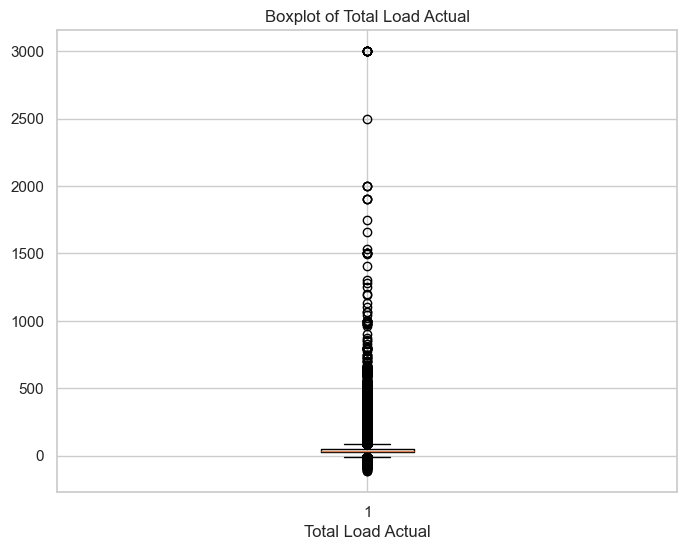

In [ ]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cost(€/MWh)'])
plt.title("Boxplot of Total Load Actual")
plt.xlabel("Total Load Actual")
plt.grid(True)
plt.show()

In [ ]:
# Filter rows where 'Cost(€/MWh)' is greater than 1000
df.loc[df['Cost(€/MWh)'] > 500]

,Unnamed: 0,Date,Hour,EU_countries,non-green_conventional_electricity,Cost(€/MWh),CurrencyType,DataSource,Updated_Date
633,633,2010-08-16,10,HU,1,2999.070,1,6,2021-10-01 12:39:53
634,634,2010-08-16,11,HU,1,2999.140,1,6,2021-10-01 12:39:53
635,635,2010-08-16,12,HU,1,2999.260,1,6,2021-10-01 12:39:53
636,636,2010-08-16,13,HU,1,2999.250,1,6,2021-10-01 12:39:53
637,637,2010-08-16,14,HU,1,2999.210,1,6,2021-10-01 12:39:53
...,...,...,...,...,...,...,...,...,...
1817510,1817510,2021-12-22,19,SICI,0,510.001,1,8,2021-12-21 13:20:20
1817511,1817511,2021-12-22,19,SUD,0,510.001,1,8,2021-12-21 13:20:20
1817538,1817538,2021-12-22,20,RS,0,522.810,1,5,2021-12-21 10:46:11
1818262,1818262,2021-12-23,18,BE,0,510.510,1,2,2021-12-22 13:26:15


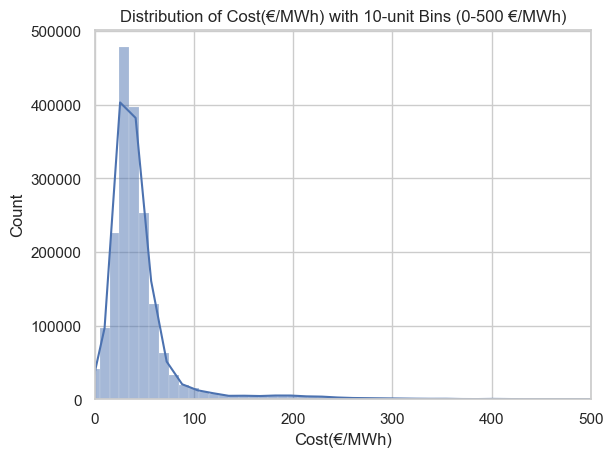

In [ ]:
# Plot histogram with bin width of 10 and x-axis limited to 0-500 €/MWh
sns.histplot(df['Cost(€/MWh)'], binwidth=10, kde=True)
plt.title('Distribution of Cost(€/MWh) with 10-unit Bins (0-500 €/MWh)')
plt.xlabel('Cost(€/MWh)')
plt.ylabel('Count')
plt.xlim(0, 500)  # Set x-axis limit to 0-500
plt.show()

In [4]:
df = pd.read_csv('./df_combined.csv', index_col=0)

In [5]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,weekday,month,business hour,weekday_category,temp_range_0,temp_range_1,temp_range_2,temp_range_3,temp_range_4,temp_weighted
0,1970-01-01 00:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,273.181801
1,1970-01-01 00:00:00.000000001+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,273.188663
2,1970-01-01 00:00:00.000000002+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.557335
3,1970-01-01 00:00:00.000000003+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.554211
4,1970-01-01 00:00:00.000000004+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.572446


In [6]:
print(df.head())
print(df.describe())
print(df.shape)

                                  time  generation biomass  \
0            1970-01-01 00:00:00+00:00               447.0   
1  1970-01-01 00:00:00.000000001+00:00               449.0   
2  1970-01-01 00:00:00.000000002+00:00               448.0   
3  1970-01-01 00:00:00.000000003+00:00               438.0   
4  1970-01-01 00:00:00.000000004+00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3 

In [7]:
# Display summary statistics for relevant columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 82 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10  gen

In [8]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1', 'temp_max_1',
       'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1', 'rain_1h_1',
       'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2', 'temp_min_2',
       'temp_max_2', 'pressure_2', 'humidity_2', 'wind_speed_2', 'wind_deg_2',
       'rain_1h_2', 'snow_3h_2', 'clouds_al

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,weekday,month,business hour,weekday_category,temp_range_0,temp_range_1,temp_range_2,temp_range_3,temp_range_4,temp_weighted
0,1970-01-01 00:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,273.181801
1,1970-01-01 00:00:00.000000001+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,273.188663
2,1970-01-01 00:00:00.000000002+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.557335
3,1970-01-01 00:00:00.000000003+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.554211
4,1970-01-01 00:00:00.000000004+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,3,1,0,0,0.0,0.0,0.0,0.0,0.0,272.572446


In [9]:
print(X_transfer.shape)
print(y_transfer.shape)
print(X_transfer_test.shape)
print(y_transfer_test.shape)

(31533, 24, 16)
(31533,)
(3483, 24, 16)
(3483,)


In [10]:
# Deep learning model with TensorFlow and Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Step 1: Define the Base Model
base_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_transfer.shape[1], X_transfer.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the base model
base_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train on the base dataset (90% of the data)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = base_model.fit(X_transfer, y_transfer, epochs=100, batch_size=32, 
                         validation_split=0.1, callbacks=[early_stopping], verbose=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Check the validation loss and whether early stopping was triggered
val_loss_history = history.history['val_loss']
final_val_loss = val_loss_history[-1]
early_stopped = len(val_loss_history) < 100  # True if early stopping occurred

# Print validation loss for each epoch
print("Validation Loss per Epoch:")
for epoch, val_loss in enumerate(val_loss_history, 1):
    print(f"Epoch {epoch}: {val_loss}")

# Print final validation loss and early stopping status
print(f"\nFinal Validation Loss: {final_val_loss}")
print(f"Early Stopping Triggered: {'Yes' if early_stopped else 'No'}")

Validation Loss per Epoch:
Epoch 1: 0.0010602318216115236
Epoch 2: 0.0008143784361891448
Epoch 3: 0.0006430523935705423
Epoch 4: 0.0005809066933579743
Epoch 5: 0.0004943796084262431
Epoch 6: 0.00040513623389415443
Epoch 7: 0.00053283671149984
Epoch 8: 0.0005529533955268562
Epoch 9: 0.0004766047350130975
Epoch 10: 0.0004404326027724892
Epoch 11: 0.0005340581992641091

Final Validation Loss: 0.0005340581992641091
Early Stopping Triggered: Yes


Early stopping is triggered when the model’s validation loss does not improve for a specified number of consecutive epochs, defined by the patience parameter. In this setup, patience=5 means that if the validation loss fails to improve over 5 epochs, training stops early to prevent overfitting and unnecessary computation. This happens when the model has either learned as much as it can from the data (convergence) or when further training would start overfitting to the training data. By setting restore_best_weights=True, the model reverts to the weights from the epoch with the lowest validation loss, ensuring optimal generalization for unseen data.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Freeze the LSTM layer to retain learned patterns from the initial data
for layer in base_model.layers[:-1]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
base_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# ------------------------------------------------
X_finetune, X_test_final, y_finetune, y_test_final = train_test_split(
    X_transfer_test, y_transfer_test, test_size=0.5, random_state=42
)

print(X_finetune.shape)

# Fine-tune on the transfer learning dataset (remaining 10%)
history_finetune = base_model.fit(X_finetune, y_finetune, epochs=30, batch_size=16, 
                                  validation_split=0.1, callbacks=[early_stopping], verbose=False)

if len(history_finetune.epoch) < 50:  # Compare to the specified epochs
    print("Early stopping was triggered. The model may not have fully converged.")

# Predictions for evaluation metrics
y_pred = base_model.predict(X_test_final)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_final, y_pred)
mae = mean_absolute_error(y_test_final, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_final, y_pred)

# Print evaluation metrics
print(f"Transfer Learning Test Loss (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

(1741, 24, 16)
Early stopping was triggered. The model may not have fully converged.
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Transfer Learning Test Loss (MSE): 0.00047921552669186635
Mean Absolute Error (MAE): 0.0159729493958059
Root Mean Squared Error (RMSE): 0.021890991907446002
R-squared (R²): 0.9255307811726041


**Consistency Across Datasets:** The small difference in loss suggests that the model generalizes well. It learned the patterns effectively during the initial training and could adapt to the new (fine-tuning) data without significant degradation in performance.

**Minimal Overfitting:** Since the validation loss and test loss after fine-tuning are nearly identical, the model likely did not overfit during either training phase. This indicates that the knowledge acquired during the initial training phase transferred well to the fine-tuning data.

**Successful Transfer Learning:** The low loss on both datasets suggests the transfer learning was effective. The model maintained high accuracy on the fine-tuning set without needing extensive retraining, which is a primary goal of transfer learning—to apply previously learned patterns to a related dataset with minimal additional training.

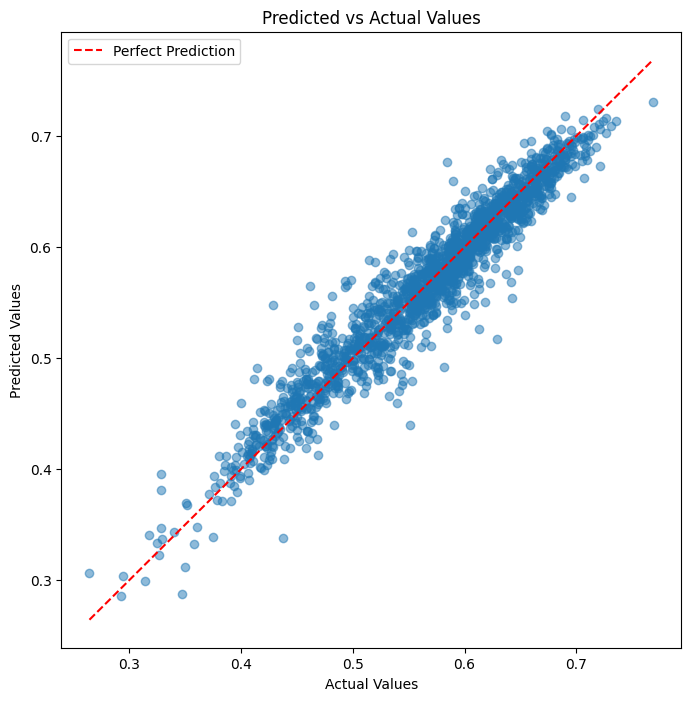

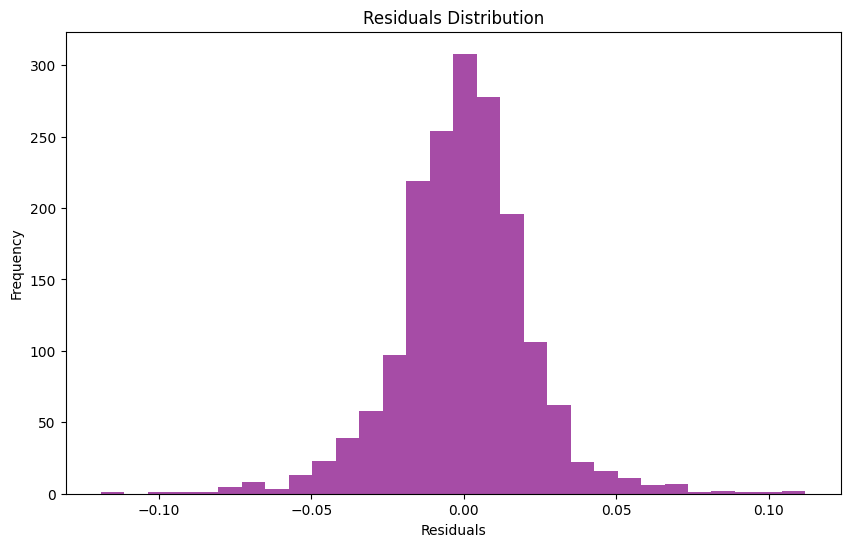

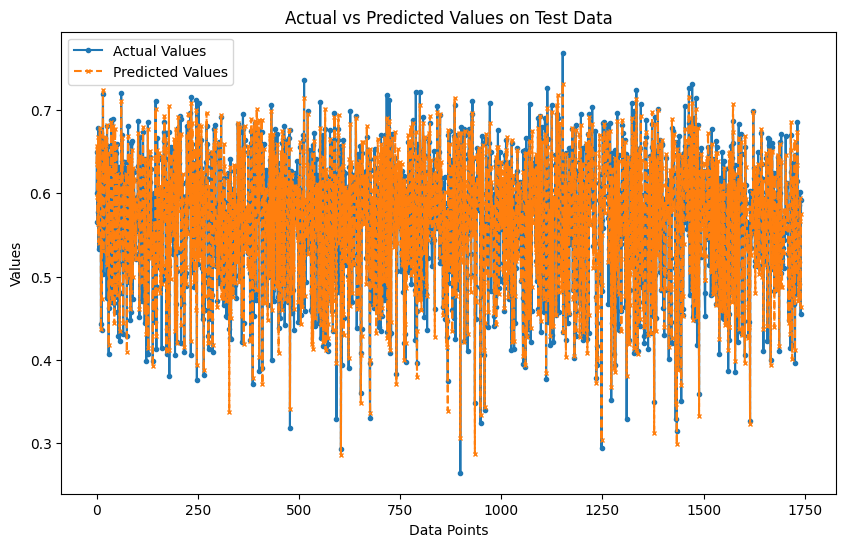

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1: Predicted vs Actual Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test_final, y_pred, alpha=0.5)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

# Plot 2: Residuals Plot
residuals = y_test_final.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Plot 3: Actual vs Predicted Over Data Points
plt.figure(figsize=(10, 6))
plt.plot(y_test_final.flatten(), label='Actual Values', marker='o', linestyle='-', markersize=3)
plt.plot(y_pred.flatten(), label='Predicted Values', marker='x', linestyle='--', markersize=3)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values on Test Data')
plt.legend()
plt.show()

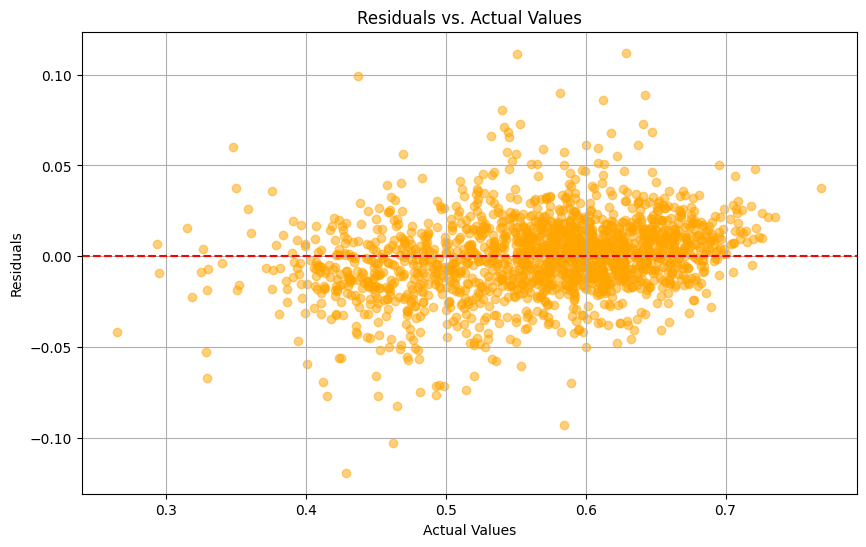

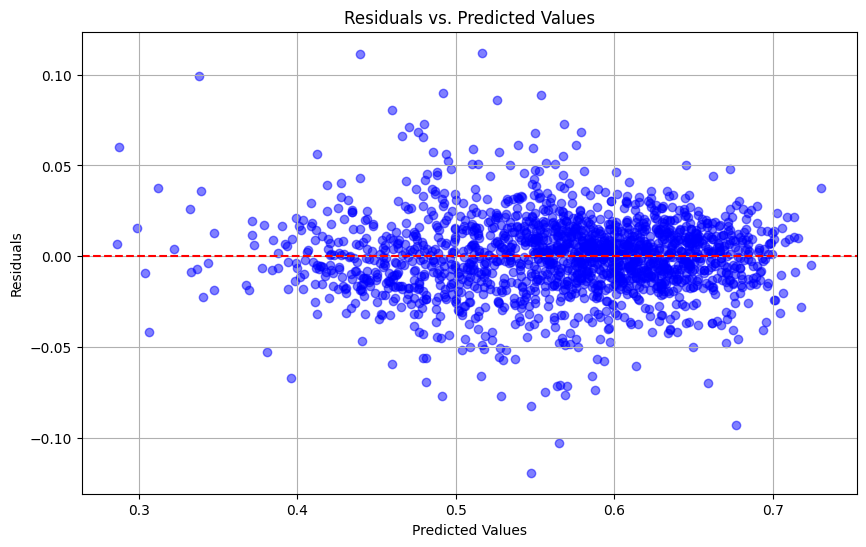

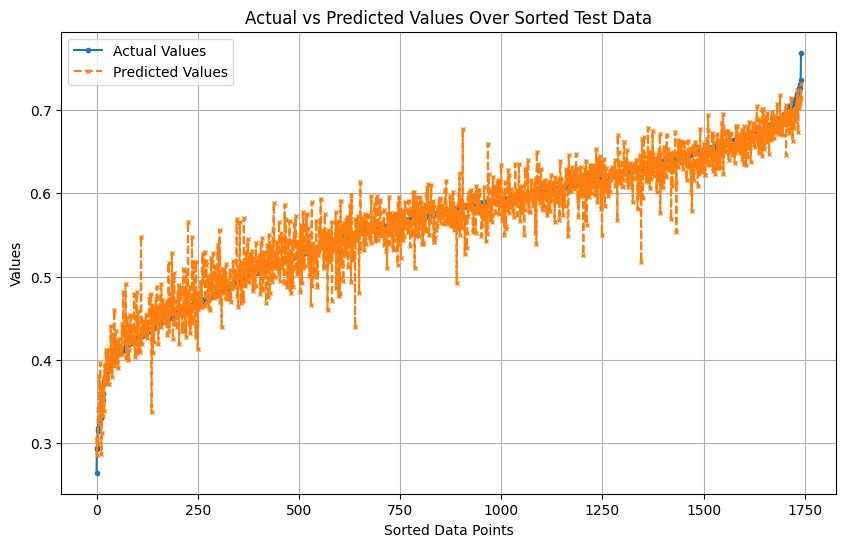

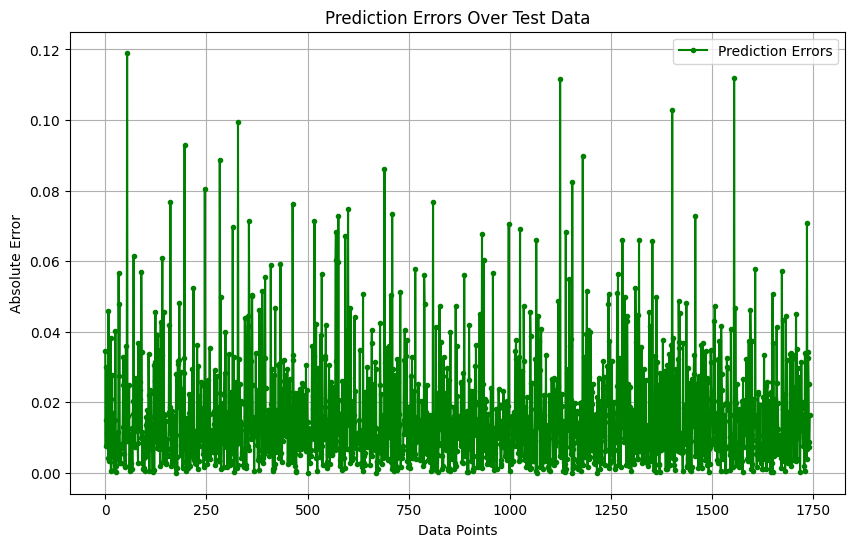

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `y_test_final`, `y_pred`, and `residuals` are defined

# Plot 4: Residuals vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

# Plot 6: Actual and Predicted Values Over Sorted Test Data
sorted_indices = np.argsort(y_test_final.flatten())
plt.figure(figsize=(10, 6))
plt.plot(y_test_final.flatten()[sorted_indices], label='Actual Values', marker='o', linestyle='-', markersize=3)
plt.plot(y_pred.flatten()[sorted_indices], label='Predicted Values', marker='x', linestyle='--', markersize=3)
plt.xlabel('Sorted Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Sorted Test Data')
plt.legend()
plt.grid(True)
plt.show()

# Plot 7: Prediction Errors (Absolute Differences)
errors = np.abs(y_test_final.flatten() - y_pred.flatten())
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Prediction Errors', marker='o', linestyle='-', markersize=3, color='green')
plt.xlabel('Data Points')
plt.ylabel('Absolute Error')
plt.title('Prediction Errors Over Test Data')
plt.legend()
plt.grid(True)
plt.show()
